# **Demo: Artificial Neural Network using Keras**
In this demo, you will learn how to: 
*   load training and testing datasets
*   preproce datasets
*   build and train an ANN model
*   report the training and validition results

We first load the related packages.

In [1]:
#Import NumPy which supports high-dimensional arrays and related operations
import numpy as np
#Import keras.utils for encoding labels by using one-hot-encoding
import matplotlib.pyplot as plt

# **MNIST Dataset**
**Step 1. Import Keras and related packages**

Keras module has provided the MNIST dataset. Import the dataset and use

In [2]:
#Import Keras mnist modules
from tensorflow.keras.datasets import mnist

**Step 2. Download MNIST dataset**

When the program executes mnist.load_data() function，the program will check 
If the file mnist.npz exists in the local dictionally “.keras\datasets”. If no, the program will download dataset from the web site. The size of this dataset is 10.9MB which will take seconds to download

In [3]:
# Load training data and testing from mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

**Step 3. Check the MNIST dataset**

After finishing the download of mnist.npz, check the content of MNIST dataset. It shows that MNIST contains 60,000 samples in training set (訓練資料) and10,000 samples in testing set (測試資料)

In [4]:
# Check the numbers of training and testing samples in MNIST
print("\t[Info] train data=", len(x_train_image))
print("\t[Info] test  data=", len(x_test_image))

	[Info] train data= 60000
	[Info] test  data= 10000


**Step 4. Display the shapes of training set in MNIST**

A sample in MNIST consists of an image (圖片) and its label (解答). The image is a gray-level image of the size 28*28. There are 60000 samples in training set.

In [5]:
print('x_train_image:', x_train_image.shape)
# x_train_image:(60000, 28, 28), there are 60000 images of  size 28*28
print('y_train_label:', y_train_label.shape)
# x_train_label:(60000,), there are 60000 labels

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


**Step 5.Use matplotlib to display training images**

To display training images in MINST, import matplotlib package and write the function plot_image() to display an image.


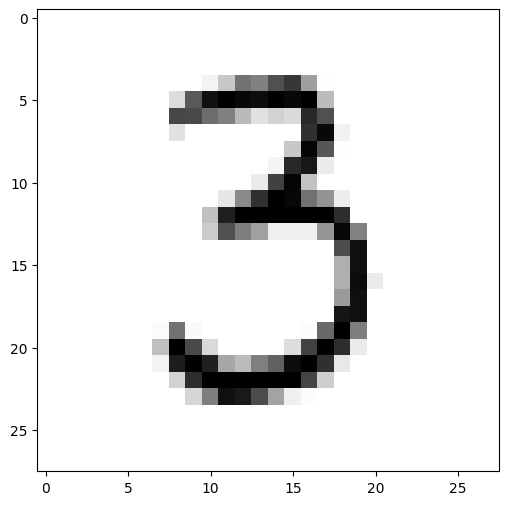

In [6]:
def plot_image(image):
  fig, ax = plt.subplots(figsize=(6, 6))
  # cmap(colormap)='binary':display in binary
  ax.imshow(image, cmap='binary')
  plt.show()


# Call plot_image() to display an image
plot_image(x_train_image[50])


**Step 6. Display multiple MNIST images**

To efficiently observe the images in MNIST, implement plot_images_labels() for multiple-image display


In [7]:
def plot_multiimages(images, labels, prediction, idx, num=32):
    fig, ax = plt.subplots(4, 8, figsize=(12, 6))
    if num > 32:
        num = 32  # if the number of images > 32，then set to 32 to avoid errors
    for i in range(0, num):
        ax = plt.subplot(4, 8, 1+i)  # Build 4x8 subgraphs
        ax.imshow(images[idx], cmap='binary')
        if len(prediction) > 0:
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "l={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1  # read the next image
    plt.show()

**Step 7. Display 32 training samples**

Run the function plot_multiimages() and display 32 training samples.The inputs to the function are x_test_image, y_test_label, and the start location of samples.

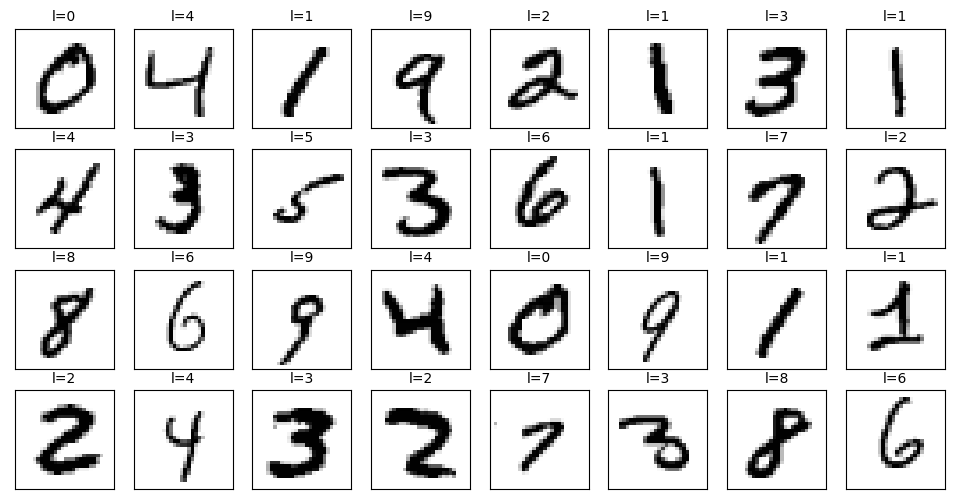

In [8]:
plot_multiimages(x_train_image, y_train_label, [], 1, 32)

**Step 8. Display the first 32 testing samples**

Use the function plot_multiimages() to display the testing dataset.

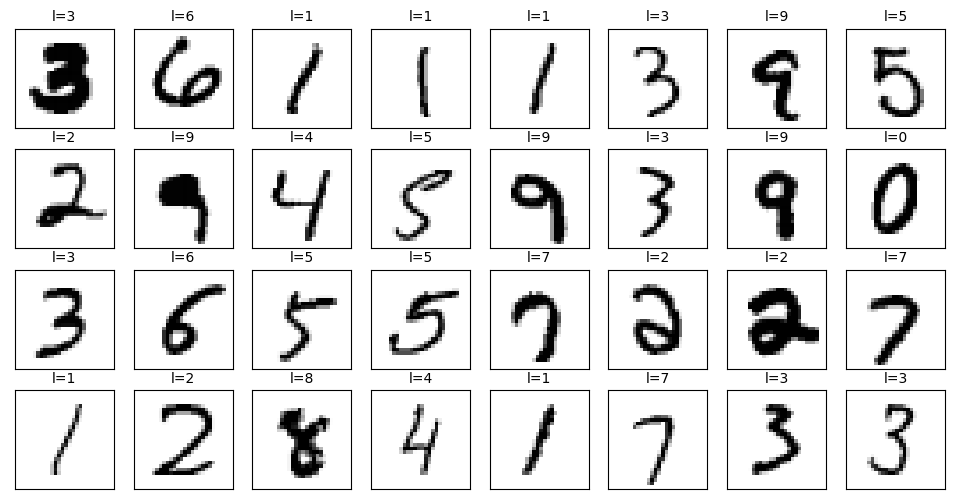

In [9]:
plot_multiimages(x_test_image, y_test_label, [], 200, 32)

# **Image Data Preprocessing**
MNIST data preprocessing contains two componets：
* Reshape 2D image (28*28) to 1D tensor of the size 784。Change the data type to be float.
* Normalize the 1D tensor to the range [0.0, 1.0].

**Step A. Reshape()**

Use reshape() to change the 28*28 2D images to 1D tensor, and use astype() to transform the data type to float(浮點數)

In [10]:
# Reshape the image from 2D image to 1D image of size 28*28
x_train = x_train_image.reshape(60000, 28*28).astype('float32')
x_test = x_test_image.reshape(10000, 28*28).astype('float32')

**Step B. Check the transformed 1D tensor content**

Use print() to check the shape of training and testing datasets.

In [11]:
print("\t[After] xtrain: {:s}".format(str(x_train.shape)))
print("\t[After] xtest: {:s}".format(str(x_test.shape)))

	[After] xtrain: (60000, 784)
	[After] xtest: (10000, 784)


**Step C. Normalize the gray levels of images**

Normalize the image gray levels from the range [0.0, 255.0] to the range [0.0, 1.0] to improve the stability of model training.

In [12]:
# Normalization [0,255]->[0.0,1.0]
x_train_norm = x_train/255
x_test_norm = x_test/255

**Step D. Check the image normalization result**

Print x_Train_normalize[0]

In [13]:
#Print the first normalized image
print(x_train_norm[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# **Image Label Preprocessing**

Labels are 0-9 integers. Use one-hot encoding to transform labels to codes containing 10 bits (0 or 1). For instance, digit ‘5’ is encoded to “0000010000”. 10 bits just map to 10 neurons in the output layer.

**Step 1. Check the original labels**

Use the comment ‘y_train_label[:5]’ to print the first labels.

In [14]:
print(y_train_label[:5])

[5 0 4 1 9]


**Step 2. One-hot encoding**

Call the function utils.to_categorical() with the parameters y_train_label(訓練資料標籤) and y_test_label(測試資料標籤) , then perform one-hot encoding.

In [15]:
# Transfer image label into one-hot-encoding
from keras.utils import np_utils
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

**Step 3. Check one-hot-encoding results**

In [16]:
print(y_TrainOneHot[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# **Build a Artificial Neural Network**

**Step A. Import keras layers and use sequential model to build a ANN model**

In [17]:
# Build a neural network
from keras.models import Sequential, Model
from keras.layers import Dense  # Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()  # Build Linear Model
# activation=sigmoid, relu, linear, exponential
model.add(Dense(units=500, input_dim=28*28, activation='relu'))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm[0:10000], y=y_TrainOneHot[0:10000],
                          validation_split=0.2, epochs=5, batch_size=16, verbose=1)

Epoch 1/5
500/500 [==============================] - 11s 14ms/step - loss: 0.5449 - accuracy: 0.8338 - val_loss: 0.2808 - val_accuracy: 0.9155
Epoch 2/5
500/500 [==============================] - 6s 11ms/step - loss: 0.2262 - accuracy: 0.9337 - val_loss: 0.3986 - val_accuracy: 0.8990
Epoch 3/5
500/500 [==============================] - 5s 11ms/step - loss: 0.1582 - accuracy: 0.9564 - val_loss: 0.2823 - val_accuracy: 0.9210
Epoch 4/5
500/500 [==============================] - 5s 9ms/step - loss: 0.1277 - accuracy: 0.9632 - val_loss: 0.3277 - val_accuracy: 0.9185
Epoch 5/5
500/500 [==============================] - 5s 10ms/step - loss: 0.1042 - accuracy: 0.9718 - val_loss: 0.2816 - val_accuracy: 0.9330


In [18]:
from keras.models import Model
from keras.layers import Dense, Input, Average

input1 = Input(shape=(784,),)
input2 = Input(shape=(784,),)

h11 = Dense(units=500, activation='relu')(input1)
h12 = Dense(units=500, activation='relu')(input2)
h21 = Dense(units=250, activation='relu')(h11)
h22 = Dense(units=250, activation='relu')(h12)
average = Average()([h21, h22])
output = Dense(units=10,activation='softmax')(average)
model = Model(inputs=[input1,input2], outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=[x_train_norm,x_train_norm], y=y_TrainOneHot, 
                          validation_split=0.2, epochs=5, batch_size=16, verbose=2)
scores = model.evaluate([x_test_norm, x_test_norm], y_TestOneHot)

Epoch 1/5
3000/3000 - 40s - loss: 0.1965 - accuracy: 0.9405 - val_loss: 0.1203 - val_accuracy: 0.9656 - 40s/epoch - 13ms/step
Epoch 2/5
3000/3000 - 35s - loss: 0.0846 - accuracy: 0.9740 - val_loss: 0.0790 - val_accuracy: 0.9753 - 35s/epoch - 12ms/step
Epoch 3/5
3000/3000 - 35s - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0828 - val_accuracy: 0.9762 - 35s/epoch - 12ms/step
Epoch 4/5
3000/3000 - 37s - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.1065 - val_accuracy: 0.9711 - 37s/epoch - 12ms/step
Epoch 5/5
3000/3000 - 37s - loss: 0.0339 - accuracy: 0.9890 - val_loss: 0.1000 - val_accuracy: 0.9774 - 37s/epoch - 12ms/step
313/313 [==============================] - 3s 8ms/step - loss: 0.0888 - accuracy: 0.9776


**Step B. Dispaly the model structure**

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 500)          392500      ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 500)          392500      ['input_2[0][0]']                
                                                                                              

**Step C. Setup training configulation and model training**

In [20]:
# loss=mean_squared_error,mean_absolute_error,categorical_crossentropy..
# optimizer=SGD (Stochastic gradient descent), adam, adagrad
'''
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm[0:10000], y=y_TrainOneHot[0:10000],
                          validation_split=0.2, epochs=5, batch_size=16, verbose=1)
'''

"\nmodel.compile(loss='categorical_crossentropy',\n              optimizer='adam', metrics=['accuracy'])\ntrain_history = model.fit(x=x_train_norm[0:10000], y=y_TrainOneHot[0:10000],\n                          validation_split=0.2, epochs=5, batch_size=16, verbose=1)\n"

**Step D. Show the training histroy**
* Show the loss curves of training and validation
* Show the accuracy curves of training and validation

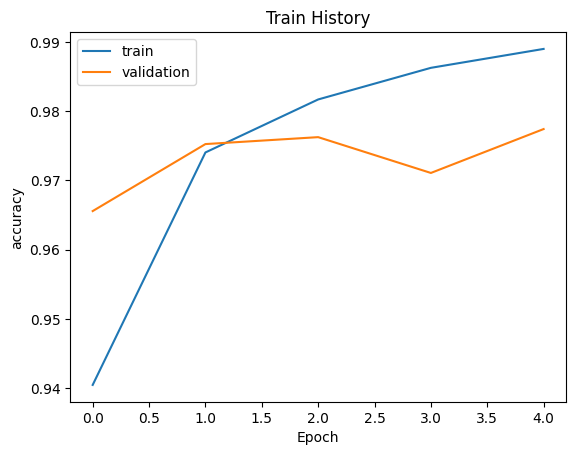

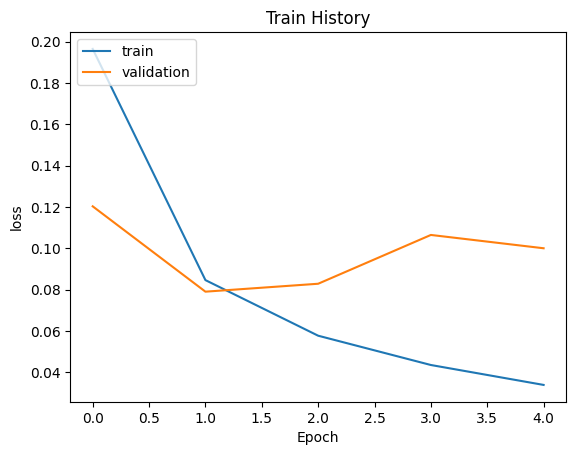

In [21]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

**Step E. Test the trained model**
* Way 1. Use evalaution function

In [22]:
scores = model.evaluate(x_test_norm, y_TestOneHot)

print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))
print("\t[Info] Making prediction to x_test_norm")

ValueError: in user code:

    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 216, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 784) dtype=float32>]


**Step E. Test the trained model**
* Way 2. Use prediction function

In [ ]:
# Making prediction and save result to prediction
prediction_prob = model.predict(x_test_norm[0:1000])
prediction = np.argmax(prediction_prob, axis=1)

print()
print("\t[Info] Show 10 prediction result (From 0):")
print("%s\n" % (prediction[0:10]))
plot_multiimages(x_test_image, y_test_label, prediction, idx=0)